<a href="https://colab.research.google.com/github/knana6/PIRO/blob/main/piro_OCR_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 패키지 설치



In [1]:
!pip -q install easyocr opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 9.6 MB/s eta 0:00:00


# 이미지 업로드

In [4]:
from google.colab import files
uploaded = files.upload()  # laundry1.png 업로드

Saving laundry1.png to laundry1.png


# 이미지 로드

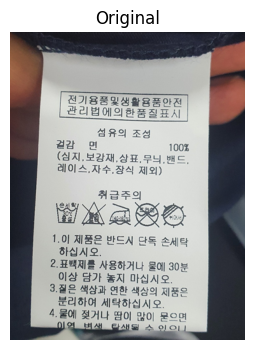

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(title, img, gray=False, figsize=(6,4)):
    """
    title   : 출력할 이미지 제목
    img     : numpy array 형태의 이미지
    gray    : True이면 그레이스케일로 출력
    figsize : matplotlib 출력 크기
    """
    plt.figure(figsize=figsize)

    # 그레이스케일 이미지인 경우, 밝기값을 그대로 시각화함
    if gray:
        plt.imshow(img, cmap='gray')
    # 컬러 이미지인 경우, openCV는 BGR 순서이므로 RGB로 변환해서 출력함
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 세탁 라벨 이미지 로드
img_bgr = cv2.imread("laundry1.png", cv2.IMREAD_COLOR)
if img_bgr is None:
    raise FileNotFoundError("laundry1.png 파일을 찾지 못했어요. 업로드한 파일명이 맞는지 확인해줘!")

show("Original", img_bgr)

# EasyOCR 실행 (원본 vs 전처리 비교)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

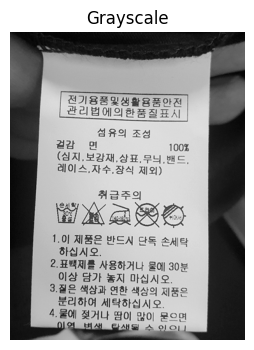

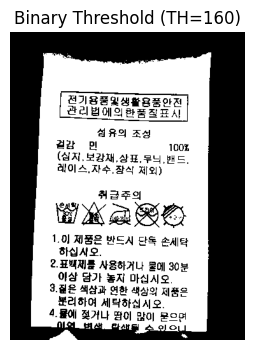

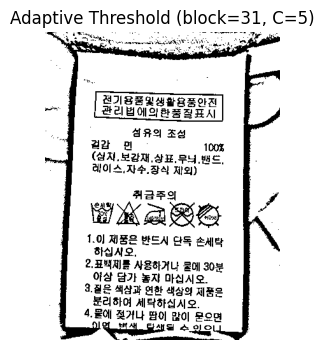

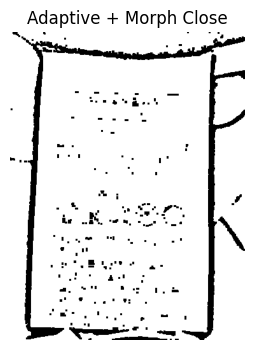

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


=== OCR 결과 (원본) ===
['적기롭품및생화3품안전', '관리법예의한품질 표시', '섬유의 조성', '건감', '1007', '(심지; 보강재 ,상표 무늬 배드.', '레이스 자수 장식 제외)', '취급주의', '갇x 등여다', '1.01 제품은 반드시 단독 손세탁', '하십시오', '2 표백제름 사용하거나 물예 30분', '이상 담가 눕지 마십시오', '3 집은 색상과 연한 색상의 제품은', '분리하여 세탁하십시오', '4.물예 젖거나 땀이 많이 문으면', '이여', '버새', '타새뭐', '이이 |']

=== OCR 결과 (고정 이진화) ===
['품기롭해교품 훌중음적', '한품질표시', '섬유의 조성', '건감', '1001', '(심치;보강재 , 상표 무늬 배드', '레이스 자수 장식 제외)', '취급 주의', 'BB= *', '1,01 제품은 반드시 단독 손세탁', '하십시오.', '2. 표의제금 사용하거나 물예 30분', '이상 담가 둥지 마십시호', '3.진혼 색상과 연한 색상의 제품은', '분리하여 세탁하십시오', '4.국예 젓거나 땀이 많이 물으면', '버새', '파새끼', '이의', '예의']

=== OCR 결과 (Adaptive+Close) ===
[]


In [ ]:
import easyocr

# 한국어+영어 (라벨은 한글이 많아서 ko 포함)
reader = easyocr.Reader(['ko','en'], gpu=False)

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# (A) 고정 임계값 이진화
# _ 변수: 추후 또 사용되는 변수가 아니니까 임의로 만든 것
_, binary = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)

# (B) 적응형 이진화 + 모폴로지(닫힘)  ← 라벨/문서에서 자주 안정적
adapt = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31, 5
)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(adapt, cv2.MORPH_CLOSE, kernel)

# 시각화
show("Grayscale", gray, gray=True)
show("Binary Threshold (TH=160)", binary, gray=True)
show("Adaptive Threshold (block=31, C=5)", adapt, gray=True)
show("Adaptive + Morph Close", close, gray=True)

# OCR 실행, 전처리별 비교
raw_text = reader.readtext(img_bgr, detail=0)
bin_text = reader.readtext(binary, detail=0)
close_text = reader.readtext(close, detail=0)

print("=== OCR 결과 (원본) ===")
print(raw_text)

print("\n=== OCR 결과 (고정 이진화) ===")
print(bin_text)

print("\n=== OCR 결과 (Adaptive+Close) ===")
print(close_text)